# PCA for dataset 1

In [93]:
import torch as t
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

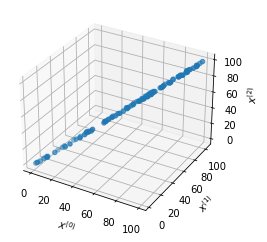

In [94]:
x1=np.random.uniform(0,100,100)
e=np.random.uniform(-5,5,100)
f=np.random.uniform(-0.5,0.5,100)
x2=x1+e
x3=x1+f
ax = plt.axes(projection ='3d')
ax.scatter(x1,x2,x3)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')

plt.show()

Text(0, 0.5, 'x3')

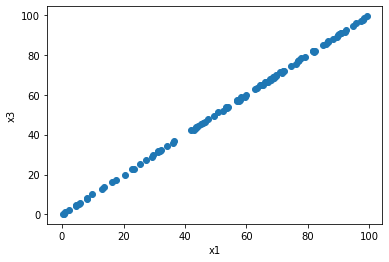

In [95]:
plt.scatter(x1,x3)
plt.xlabel('x1')
plt.ylabel('x3')

Text(0, 0.5, 'x2')

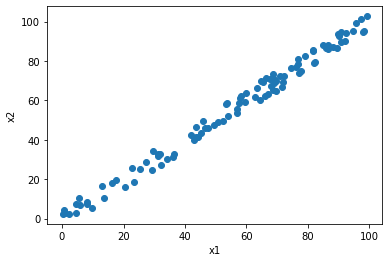

In [96]:
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2')

In [97]:
x0=np.stack((x1,x2,x3))

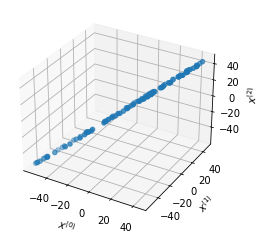

In [98]:
mx1=0
mx2=0
mx3=0
for i in range(100):
    mx1=mx1+x1[i]
    mx2=mx2+x2[i]
    mx3=mx3+x3[i]
mx1=mx1/100
mx2=mx2/100
mx3=mx3/100
x11=x1-mx1
x22=x2-mx2
x33=x3-mx3
ax = plt.axes(projection ='3d')
ax.scatter(x11,x22,x33)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')
plt.show()
x=np.stack((x11,x22,x33))
Rx=x@np.transpose(x)
Rx=Rx/x.shape[1]

In [101]:
Ev,EV=np.linalg.eig(Rx)
#np.shape(x11)
#Ev=np.sort(Ev)
sorted_index = np.argsort(-Ev)
Ev = Ev[sorted_index]
EV = EV[:, sorted_index]


(3, 100)

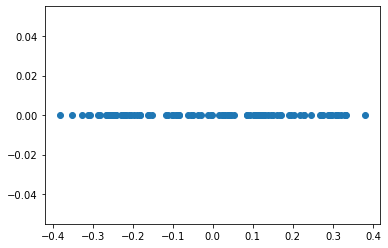

In [102]:
#y1=np.transpose(EV)@x[:,0]
#y2=np.transpose(EV)@x22
#y3=np.transpose(EV)@x22
#plt.scatter(y1,np.zeros(100))
#np.shape(y1)
Y=np.transpose(EV)@x
plt.scatter(Y[2,:],np.zeros(100))
np.shape(Y)

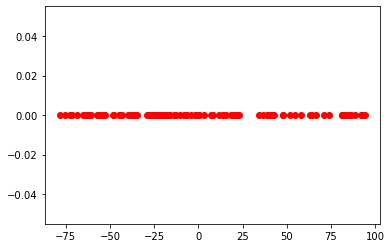

In [103]:
plt.scatter(Y[0,:],np.zeros(100),color='red')

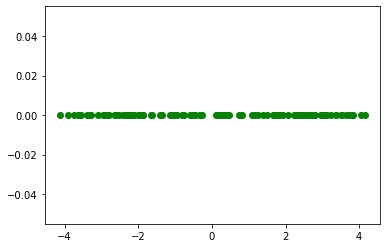

In [104]:
plt.scatter(Y[1,:],np.zeros(100),color='green')

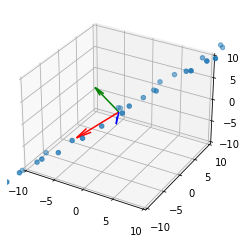

In [115]:
eig_vect1 = EV[:,0]
eig_vect2 = EV[:,2]
eig_vect3=EV[:,1]
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
start=[0,0,0]
ax.quiver(start[0],start[1],start[2],eig_vect1[0]*Ev[0]/300,eig_vect1[1]*Ev[0]/300,eig_vect1[2]*Ev[0]/300,color='red')
ax.quiver(start[0],start[1],start[2],eig_vect2[0]*Ev[1],eig_vect2[1]*Ev[1],eig_vect2[2]*Ev[1],color='green')
ax.quiver(start[0],start[1],start[2],eig_vect3[0]*Ev[2]*200,eig_vect3[1]*Ev[2]*200,eig_vect3[2]*Ev[2]*200,color='blue')
ax.scatter(x11,x22,x33)



In [108]:
#Y=np.stack((y1,y2,y3))
RY=Y@np.transpose(Y)/Y.shape[1]
RY

array([[ 2.39635300e+03, -7.05076598e-14,  5.75539616e-14],
       [-7.05076598e-14,  5.78674874e+00,  9.48707779e-14],
       [ 5.75539616e-14,  9.48707779e-14,  4.30819152e-02]])

In [109]:
R_Y=np.transpose(EV)@Rx@EV
R_Y

array([[ 2.39635300e+03, -2.47902185e-13,  3.11953869e-13],
       [-2.29316687e-13,  5.78674874e+00,  1.30162358e-13],
       [ 2.11563575e-13,  1.87057072e-13,  4.30819152e-02]])

Text(0.5, 0, '$xh^{(2)}$')

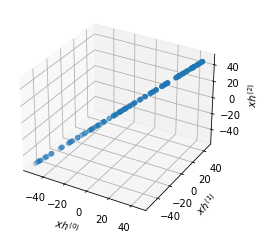

In [14]:
#m=1
Xh0=(EV[:,0].reshape(3,1))@Y[0,:].reshape(1,100)
ax = plt.axes(projection ='3d')
ax.scatter(Xh0[0,:],Xh0[1,:],Xh0[2,:])
ax.set_xlabel('$xh^{(0)}$')
ax.set_ylabel('$xh^{(1)}$')
ax.set_zlabel('$xh^{(2)}$')

Text(0.5, 0, '$xh^{(2)}$')

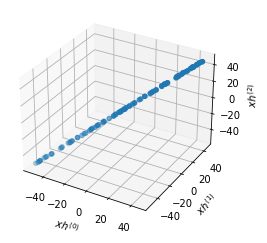

In [15]:
#m=2
Xh1=(EV[:,0:2])@Y[0:2,:]
ax = plt.axes(projection ='3d')
ax.scatter(Xh1[0,:],Xh1[1,:],Xh1[2,:])
ax.set_xlabel('$xh^{(0)}$')
ax.set_ylabel('$xh^{(1)}$')
ax.set_zlabel('$xh^{(2)}$')
#np.shape(Xh)

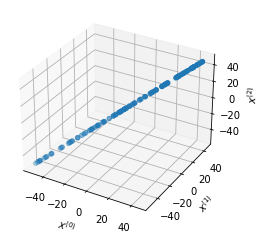

In [16]:
#m=1,undoing effect
mxh1=0
mxh2=0
mxh3=0
for i in range(100):
    mxh1=mxh1+Xh0[0,i]
    mxh2=mxh2+Xh0[1,i]
    mxh3=mxh3+Xh0[2,i]
mxh1=mxh1/100
mxh2=mxh2/100
mxh3=mxh3/100
x11=Xh0[0,:]+mxh1
x22=Xh0[1,:]+mxh2
x33=Xh0[2,:]+mxh3
ax = plt.axes(projection ='3d')
ax.scatter(x11,x22,x33)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')
plt.show()

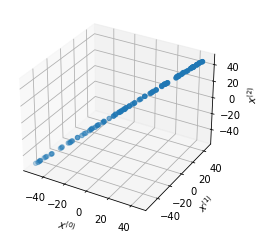

In [17]:
#m=2,undoing effect
mxh1=0
mxh2=0
mxh3=0
for i in range(100):
    mxh1=mxh1+Xh1[0,i]
    mxh2=mxh2+Xh1[1,i]
    mxh3=mxh3+Xh1[2,i]
mxh1=mxh1/100
mxh2=mxh2/100
mxh3=mxh3/100
x11=Xh1[0,:]+mxh1
x22=Xh1[1,:]+mxh2
x33=Xh1[2,:]+mxh3
ax = plt.axes(projection ='3d')
ax.scatter(x11,x22,x33)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')
plt.show()

In [120]:
#m=1,mse
mse1=Ev[1]+Ev[2]
#m=2,mse
mse2=Ev[2]
mse1

5.8298306548942955

Text(0.5, 0, '$x^{(2)}$')

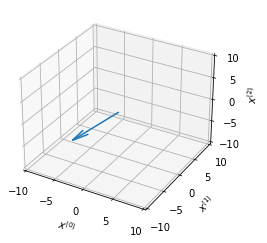

In [19]:
#m=1
eig_vect1 = EV[:,0]
eig_vect2 = EV[:,1]
#origin = [0, 0, 0]
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
start=[0,0,0]
ax.quiver(start[0],start[1],start[2],eig_vect1[0]*Ev[0]/300,eig_vect1[1]*Ev[0]/300,eig_vect1[2]*Ev[0]/300)
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')


Text(0.5, 0, '$x^{(2)}$')

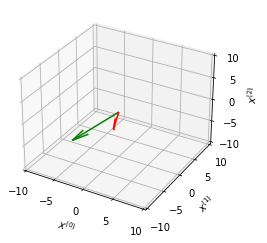

In [20]:
#m=2
eig_vect1 = EV[:,0]
eig_vect2 = EV[:,2]
#origin = [0, 0, 0]
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
ax.set_zlim([-10,10])
start=[0,0,0]
ax.quiver(start[0],start[1],start[2],eig_vect1[0]*Ev[0]/300,eig_vect1[1]*Ev[0]/300,eig_vect1[2]*Ev[0]/300,color='green')
ax.quiver(start[0],start[1],start[2],eig_vect2[0]*Ev[1]*2,eig_vect2[1]*Ev[1]*2,eig_vect2[2]*Ev[1]*2,color='red')
#the second eigen value is relatively low compared to first eigen value , so I multiplied it with a factor of 10 and divided the first eigen value with 300 to show them in plot
ax.set_xlabel('$x^{(0)}$')
ax.set_ylabel('$x^{(1)}$')
ax.set_zlabel('$x^{(2)}$')

# PCA for data set 2

In [127]:
from sklearn.datasets import fetch_olivetti_faces
import torch as t
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
print("Original x shape:", x.shape)
X = x.reshape((400, 4096))
Z=np.transpose(X)
print("New x shape:", X.shape)

Original x shape: (400, 64, 64)
New x shape: (400, 4096)


In [128]:
#subtracting mean
for i in range(len(X[0,:])):
    X[:,i]=X[:,i]-np.mean(X[:,i])

In [129]:
#finding covariance matrix
RX=np.transpose(X)@X/400
#np.shape(cv)

In [131]:
#finding eigen values and eigen vectors(A) of covariance matrix
[e,ev]=np.linalg.eig(RX)
sorted_index = np.argsort(-e)
e = e[sorted_index]
ev = ev[:, sorted_index]

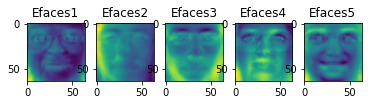

In [132]:
#plotting Eigen faces or vectors using PCA
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(ev[:,i].reshape(64,64))
    plt.title(f"Efaces{i+1}")

In [133]:
#finding m such that error is less than 5%
err=0
m=0
for i in range(len(e)):
    err=err+e[i]
    m=m+1
    if err>(0.95*np.sum(e)):
        break
m

123

In [134]:
#1%
err=0
n=0
for i in range(len(e)):
    err=err+e[i]
    n=n+1
    if err>(0.99*np.sum(e)):
        break
n

260

In [135]:
#10%
err=0
p=0
for i in range(len(e)):
    err=err+e[i]
    p=p+1
    if err>(0.90*np.sum(e)):
        break
p

66

In [136]:
#20%
err=0
q=0
for i in range(len(e)):
    err=err+e[i]
    q=q+1
    if err>(0.80*np.sum(e)):
        break
q

27

In [137]:
Y1=np.transpose(ev[:,0:n])@X[0,:].reshape(4096,1)
Y2=np.transpose(ev[:,0:m])@X[0,:].reshape(4096,1)
Y3=np.transpose(ev[:,0:p])@X[0,:].reshape(4096,1)
Y4=np.transpose(ev[:,0:q])@X[0,:].reshape(4096,1)


In [138]:
xh1=ev[:,0:n]@(Y1)
xh2=ev[:,0:m]@(Y2)
xh3=ev[:,0:p]@(Y3)
xh4=ev[:,0:q]@(Y4)
    

In [139]:
xh1=xh1.reshape(64,64)
xh2=xh2.reshape(64,64)
xh3=xh3.reshape(64,64)
xh4=xh4.reshape(64,64)

Text(0.5, 1.0, 'Original Image')

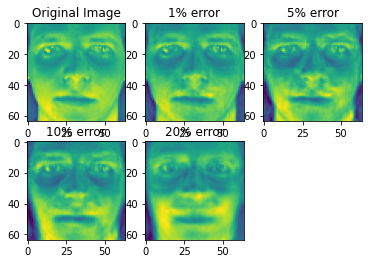

In [140]:
plt.subplot(2,3,2)
plt.imshow(xh1.real)
plt.title("1% error")
plt.subplot(2,3,3)
plt.imshow(xh2.real)
plt.title("5% error")
plt.subplot(2,3,4)
plt.imshow(xh3.real)
plt.title("10% error")
plt.subplot(2,3,5)
plt.imshow(xh4.real)
plt.title("20% error")
plt.subplot(2,3,1)
plt.imshow(X[0,:].reshape(64,64))
plt.title("Original Image")

In [145]:
#Calculating mean square error
err = np.sum((X[0,:].reshape(64,64).astype("float") - xh4.real.astype("float")) ** 2)
err /= float(x[1].shape[0] * xh1.shape[1])
err*100

0.31852297173692046

Text(0.5, 1.0, 'Error image')

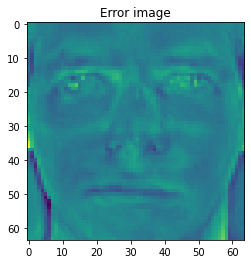

In [146]:
err=X[0,:].reshape(64,64)-xh4
plt.imshow(err)
plt.title("Error image")

In [147]:
Y=X@ev

In [148]:
np.shape(Y)

(400, 4096)

In [149]:
z=Y[0,:]
len(z)

4096

Text(0.5, 1.0, 'mse vs eigen vectors')

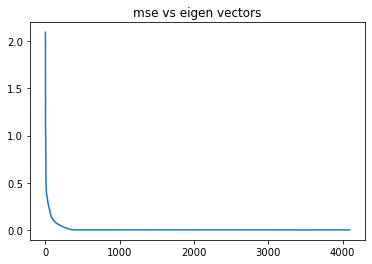

In [41]:
r=np.zeros(len(z))
mse=np.zeros(len(z))
zim=np.zeros(len(z))
for i in range(len(z)):
    zim[0:i]=z[0:i]
    r=ev@np.transpose(zim)
    error=r-X[0,:]
    mse[i]=(error@error/len(z))*100
plt.plot(mse)
plt.title("mse vs eigen vectors")

# SVD for dataset 1

In [42]:
import torch as t
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from scipy.spatial.distance import cdist

In [43]:
x1=np.random.uniform(-10,10,1000)
x2=np.random.uniform(-10,10,1000)
x3=np.random.uniform(-1,1,1000)

In [44]:
x0=np.stack((x1,x2,x3))

In [62]:
A=np.transpose(x0)@x0
B=x0@np.transpose(x0)
u,U=np.linalg.eig(B)
v,V=np.linalg.eig(A)
sorted_index = np.argsort(-u)
u = u[sorted_index]
U = U[:, sorted_index]
sorted_index1 = np.argsort(-v)
v = v[sorted_index1]
V = V[:, sorted_index1]


In [52]:
U

array([[ 8.61143868e-01,  5.08287451e-01,  8.66638213e-03],
       [ 5.08305803e-01, -8.61176638e-01,  9.83871600e-05],
       [-7.51329478e-03, -4.32044683e-03,  9.99962441e-01]])

In [53]:
V

array([[ 3.85994127e-02+0.j        , -1.67832955e-02+0.j        ,
         3.71670152e-02+0.j        , ...,  1.01071481e-02+0.00106709j,
         1.01071481e-02-0.00106709j, -5.84075064e-06+0.j        ],
       [-5.14905538e-02+0.j        , -2.48040159e-02+0.j        ,
         4.76983785e-02+0.j        , ..., -1.04427849e-02+0.00079196j,
        -1.04427849e-02-0.00079196j,  3.01127213e-02+0.j        ],
       [-1.18826971e-02+0.j        ,  1.22610084e-02+0.j        ,
        -2.99243272e-02+0.j        , ..., -1.85703283e-03+0.00842964j,
        -1.85703283e-03-0.00842964j, -1.29746922e-02+0.j        ],
       ...,
       [-2.49391033e-02+0.j        , -4.15684624e-02+0.j        ,
        -5.11953635e-02+0.j        , ...,  3.09116374e-03-0.0330411j ,
         3.09116374e-03+0.0330411j , -4.01722394e-02+0.j        ],
       [-4.37661549e-02+0.j        , -1.10955248e-02+0.j        ,
         3.58130085e-02+0.j        , ...,  2.56802950e-02+0.00515363j,
         2.56802950e-02-0.00515363j

In [54]:
#calculating Sigma
uu=np.zeros(len(u))
for i in range(len(u)):
    uu[i]=np.sqrt(u[i])
Sigma=np.zeros((3,100))
Sigma[:,0:3]=np.diag(uu)
(Sigma)

array([[184.83163175,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [55]:
#calculating Sigmar
r=np.linalg.matrix_rank(Sigma)
Sigmar=Sigma[:,0:r]
(Sigmar)

array([[184.83163175,   0.        ,   0.        ],
       [  0.        , 179.87625652,   0.        ],
       [  0.        ,   0.        ,  18.17217878]])

In [56]:
Ur=U[:,0:r]
Ur

array([[ 8.61143868e-01,  5.08287451e-01,  8.66638213e-03],
       [ 5.08305803e-01, -8.61176638e-01,  9.83871600e-05],
       [-7.51329478e-03, -4.32044683e-03,  9.99962441e-01]])

In [57]:
Vr=V[0:r,:]
(Vr)

array([[ 3.85994127e-02+0.j        , -1.67832955e-02+0.j        ,
         3.71670152e-02+0.j        , ...,  1.01071481e-02+0.00106709j,
         1.01071481e-02-0.00106709j, -5.84075064e-06+0.j        ],
       [-5.14905538e-02+0.j        , -2.48040159e-02+0.j        ,
         4.76983785e-02+0.j        , ..., -1.04427849e-02+0.00079196j,
        -1.04427849e-02-0.00079196j,  3.01127213e-02+0.j        ],
       [-1.18826971e-02+0.j        ,  1.22610084e-02+0.j        ,
        -2.99243272e-02+0.j        , ..., -1.85703283e-03+0.00842964j,
        -1.85703283e-03-0.00842964j, -1.29746922e-02+0.j        ]])

Text(0, 0.5, '$x^{(1)}$')

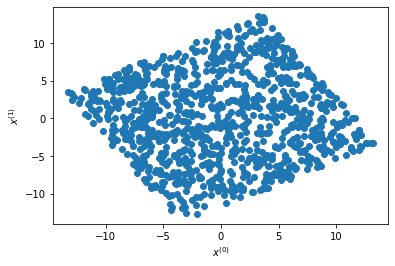

In [58]:
Urr=np.stack((Ur[:,0],Ur[:,1],Ur[:,2]))
Urr=np.transpose(Urr)
Y=np.transpose(Urr[:,0:2])@x0
#np.shape(Y)
plt.scatter(Y[0,:],Y[1,:])
plt.xlabel('$x^{(0)}$')
plt.ylabel('$x^{(1)}$')
#np.shape(Y)

In [59]:
#pairwise euclidean distance matrix D
a1=x0[:,0:10].reshape(3,10)
D=cdist(np.transpose(a1), np.transpose(a1), 'euclid')
D

array([[ 0.        , 16.71495597, 10.76300986, 17.97095599,  2.58595875,
        14.34208664,  6.37002359, 11.54444976,  9.94123624, 12.87151484],
       [16.71495597,  0.        , 10.00170325,  7.10909582, 14.71699728,
         2.60423422, 18.14919471,  9.9006402 , 10.95398649, 11.12552555],
       [10.76300986, 10.00170325,  0.        ,  7.80994205, 10.07384449,
         8.20511839,  9.19073937, 12.74883509,  1.1426876 ,  2.53392014],
       [17.97095599,  7.10909582,  7.80994205,  0.        , 16.75911381,
         7.54014688, 16.80557434, 15.49632234,  8.85913927,  7.14252166],
       [ 2.58595875, 14.71699728, 10.07384449, 16.75911381,  0.        ,
        12.30918301,  8.14923996,  9.02569108,  9.47540069, 12.4263982 ],
       [14.34208664,  2.60423422,  8.20511839,  7.54014688, 12.30918301,
         0.        , 15.97310753,  8.24284399,  9.08094404,  9.71971063],
       [ 6.37002359, 18.14919471,  9.19073937, 16.80557434,  8.14923996,
        15.97310753,  0.        , 16.25001506

In [118]:
#Calculating Euclidean distance matrix Dh from Xh
Xh=Urr[:,0:2]@Sigmar[0:2,0:2]@np.transpose(V[:,0:2])
a2=Xh[:,0:10].reshape(3,10)
Dh=cdist(np.transpose(a2), np.transpose(a2), 'euclid')
Dh

array([[ 0.        ,  7.81392618,  1.34756317, 11.85430502,  3.48743435,
         7.18035926,  0.58374214,  4.52214626,  2.41885332,  4.07150175],
       [ 7.81392618,  0.        ,  6.50285119, 18.40307783,  4.32662571,
        14.05854799,  8.23958333, 11.48095679, 10.18748031,  4.66067737],
       [ 1.34756317,  6.50285119,  0.        , 12.68549035,  2.18575611,
         8.06507961,  1.73730451,  5.37975276,  3.68528328,  2.80412479],
       [11.85430502, 18.40307783, 12.68549035,  0.        , 14.61191553,
         4.68045766, 11.2710831 ,  7.33829908,  9.82321429, 13.74340976],
       [ 3.48743435,  4.32662571,  2.18575611, 14.61191553,  0.        ,
        10.07246822,  3.92198005,  7.41071983,  5.86914406,  1.92278228],
       [ 7.18035926, 14.05854799,  8.06507961,  4.68045766, 10.07246822,
         0.        ,  6.59808203,  2.68608883,  5.17181102,  9.42624579],
       [ 0.58374214,  8.23958333,  1.73730451, 11.2710831 ,  3.92198005,
         6.59808203,  0.        ,  3.93840412

In [117]:
#finding frobenius norm diffence
A=D-Dh
Frobnorm=np.linalg.norm(A,'fro')
Frobnorm

63.90354684270022

# SVD for Data set 2

In [63]:
from sklearn.datasets import fetch_olivetti_faces
import torch as t
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Olivetti faces dataset
olivetti = fetch_olivetti_faces()
x = olivetti.images
print("Original x shape:", x.shape)
X = x.reshape((400, 4096))
Z=np.transpose(X)
print("New x shape:", X.shape)

Original x shape: (400, 64, 64)
New x shape: (400, 4096)


In [75]:
A=np.transpose(X)@X
B=X@np.transpose(X)
u,U=np.linalg.eig(A)
v,V=np.linalg.eig(B)
sorted_index = np.argsort(-u)
u = u[sorted_index]
U = U[:, sorted_index]
sorted_index1 = np.argsort(-v)
v = v[sorted_index1]
V = V[:, sorted_index1]
np.shape(U)

(4096, 4096)

In [76]:
#calculating sigmar
r=np.linalg.matrix_rank(V)
v=np.sqrt(v)
Sigmar=np.diag(v)
Ur=U[:,0:r]
Vr=V[0:r,:]
Sigmar

array([[717.22144   ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  67.45447   ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  50.511276  , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.82158035,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.794864  ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.7195294 ]], dtype=float32)

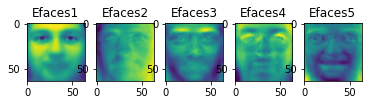

In [77]:
#plotting eigen faces using SVD
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(U[:,i].reshape(64,64))
    plt.title(f"Efaces{i+1}")

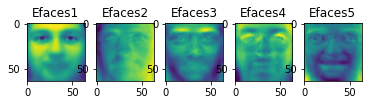

In [79]:
#efaces using pca
RX=np.transpose(X)@X/400
[e,ev]=np.linalg.eig(RX)
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(ev[:,i].reshape(64,64))
    plt.title(f"Efaces{i+1}")

In [80]:
#1% finding k value
err=0
n=0
for i in range(len(u)):
    err=err+u[i]
    n=n+1
    if err>(0.99*np.sum(u)):
        break
n

34

In [81]:
#5% finding k value
err=0
m=0
for i in range(len(u)):
    err=err+u[i]
    m=m+1
    if err>(0.95*np.sum(u)):
        break
m

1

In [82]:
#10% finding k value
err=0
p=0
for i in range(len(u)):
    err=err+u[i]
    p=p+1
    if err>(0.90*np.sum(u)):
        break
p

1

In [83]:
#20% finding k value
err=0
q=0
for i in range(len(u)):
    err=err+u[i]
    q=q+1
    if err>(0.80*np.sum(u)):
        break
q

1

In [110]:
Vk=V[:,0:n]
#for image no 0 calculating Y and Xhat
A1=Sigmar[0:n,0:n]@np.transpose(Vk)
A2=Sigmar[0:m,0:m]@np.transpose(V[:,0:m])
A3=Sigmar[0:p,0:p]@np.transpose(V[:,0:p])
A4=Sigmar[0:q,0:q]@np.transpose(V[:,0:q])
xh1=Ur[:,0:n]@A1[0:n,10]
xh2=Ur[:,0:m]@A2[0:m,10]
xh3=Ur[:,0:p]@A3[0:p,10]
xh4=Ur[:,0:q]@A4[0:q,10]
xh1=xh1.reshape(64,64)
xh2=xh2.reshape(64,64)
xh3=xh3.reshape(64,64)
xh4=xh4.reshape(64,64)
#for image 10 calculating Y and Xhat
W1=Sigmar[0:n,0:n]@np.transpose(V[:,0:n])
W2=Sigmar[0:m,0:m]@np.transpose(V[:,0:m])
W3=Sigmar[0:p,0:p]@np.transpose(V[:,0:p])
W4=Sigmar[0:q,0:q]@np.transpose(V[:,0:q])
zh1=Ur[:,0:n]@(W1[0:n,0])
zh2=Ur[:,0:m]@(W2[0:m,0])
zh3=Ur[:,0:p]@(W3[0:p,0])
zh4=Ur[:,0:q]@(W4[0:q,0])
zh1=zh1.reshape(64,64)
zh2=zh2.reshape(64,64)
zh3=zh3.reshape(64,64)
zh4=zh4.reshape(64,64)  

Text(0.5, 1.0, 'Original Image')

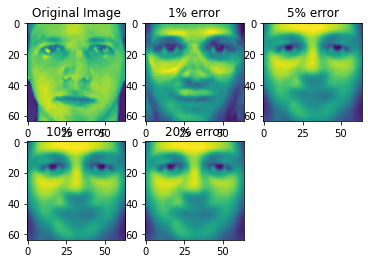

In [111]:
#plotting same image 0 with different errors
plt.subplot(2,3,2)
plt.imshow(xh1.real)
plt.title("1% error")
plt.subplot(2,3,3)
plt.imshow(xh2.real)
plt.title("5% error")
plt.subplot(2,3,4)
plt.imshow(xh3.real)
plt.title("10% error")
plt.subplot(2,3,5)
plt.imshow(xh4.real)
plt.title("20% error")
plt.subplot(2,3,1)
plt.imshow(X[0,:].reshape(64,64))
plt.title("Original Image")

Text(0.5, 1.0, 'Original Image')

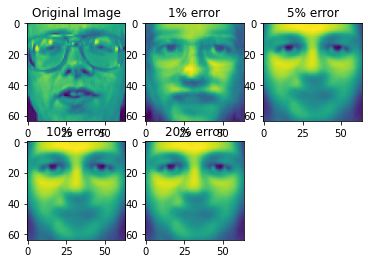

In [112]:
#plotting image 10 with different errors
plt.subplot(2,3,2)
plt.imshow(zh1.real)
plt.title("1% error")
plt.subplot(2,3,3)
plt.imshow(zh2.real)
plt.title("5% error")
plt.subplot(2,3,4)
plt.imshow(zh3.real)
plt.title("10% error")
plt.subplot(2,3,5)
plt.imshow(zh4.real)
plt.title("20% error")
plt.subplot(2,3,1)
plt.imshow(X[10,:].reshape(64,64))
plt.title("Original Image")

In [114]:
#computing frobenius norm
G=np.array([xh1,xh2,xh3,xh4])
H=np.array([zh1,zh2,zh3,zh4])
fb1=np.zeros(4)
fb2=np.zeros(4)
for i in range(4):
    fb1[i]=np.linalg.norm(G[i]-X[0,:].reshape(64,64),'fro')
    fb2[i]=np.linalg.norm(H[i]-X[10,:].reshape(64,64),'fro')
fb2
    
    

array([11.3537302 ,  9.21290493,  9.21290493,  9.21290493])